In [1]:
## importing of libraries
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Settings
pd.set_option('display.max_columns', None)

In [2]:
#loading the datset
df = pd.read_csv('IntrusionDataset.csv')

In [3]:
#show first 5 records
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75.0,1.0,1.0,982.0,1430.0,982.0,982.0,982.0,0.00,1430.0,1430.0,1430.00,0.00,32160000.00,26666.67,75.0,0.00,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,13333.33,13333.33,982.0,1430.0,1280.67,258.65,66901.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1921.00,982.0,1430.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,982.0,1.0,1430.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,75.0,0.00,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,564.97,2655.0,2261.33,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.00,5310.0,5310.0,0.0,0.0,0.0,0.0,20.0,44.0,188.32,376.65,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,-1.0,14600.0,0.0,0.0,0.0,0.0,0.0,0.0,2655.0,2261.33,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/7/2019 1:24,141.0,0.0,3.0,0.0,2806.0,0.0,0.0,0.0,0.00,1388.0,30.0,935.33,784.04,19900709.22,21276.60,70.5,0.71,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.71,71.0,70.0,0.0,0.0,0.0,0.0,0.0,96.0,0.00,21276.60,30.0,1388.0,1048.50,679.00,461041.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1398.00,0.0,935.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2806.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,70.5,0.71,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,4/9/2019 3:58,151.0,0.0,2.0,0.0,2776.0,0.0,0.0,0.0,0.00,1388.0,1388.0,1388.00,0.00,18384105.96,13245.03,151.0,0.00,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.00,151.0,151.0,0.0,0.0,0.0,0.0,0.0,64.0,0.00,13245.03,1388.0,1388.0,1388.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2082.00,0.0,1388.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2776.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.00,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/9/2019 1:41,153.0,2.0,1.0,886.0,420.0,452.0,434.0,443.0,12.73,420.0,420.0,420.00,0.00,8535947.71,19607.84,76.5,0.71,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,13071.90,6535.95,420.0,452.0,431.50,15.18,230.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.33,443.0,420.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,886.0,1.0,420.0,-1.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,76.5,0.71,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [4]:
#checking for the number of rows and columns
df.shape

(625783, 86)

In [5]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  float64
 8   Tot_Fwd_Pkts       625783 non-null  float64
 9   Tot_Bwd_Pkts       625783 non-null  float64
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [6]:
#To check for statistical features
df.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00,625783.00,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.0,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,6.257830e+05,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.0,625783.0,625783.0,625783.0,625783.0,625783.0,625783.000000,625783.000000,625783.00000,625783.000000,625783.0,625783.000000,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,373.556635,28.161073,681.424563,588.665338,637.107241,62.991108,inf,inf,483.462565,63.136940,565.820169,443.103039,102.157949,52.515514,27.689277,85.024112,34.679327,516.792743,446.964593,28.790685,486.704898,428.857417,0.0,0.026410,0.0,0.000051,22.490408,33.719612,5.030727e+04,27818.105348,511.645564,700.089229,633.666632,102.553349,69676.670371,0.000527,0.092946,0.000486,0.026410,0.530475,0.000051,0.000206,0.000067,0.364652,915.246543,373.556635,637.107241,0.0,0.0,0.0,0.0,0.0,0.0,1.675566,570.738980,1.46853,929.280973,-1.0,5880.924744,1.509913,0.0,3.764404,0.353389,4.248735,3.462159,502.50384,52.404062,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,596.552821,144.356068,694.997621,682.938908,669.563545,227.773054,NaN,NaN,1892.861517,1159.713179,2866.325298,1719.332813,2216.304460,1212.002428,959.023288,1935.611451,1000.385742,3147.286789,2242.463582,808.672336,2751.967326,2177.830162,0.0,0.160352,0.0,0.007151,41.530486,40.283654,1.644118e+05,78481.469866,653.951208,696.842817,652.305975,243.227098,179138.678161,0.022958,0.290357,0.022035,0.160352,0.499071,0.007151,0.014356,0.008192,0.499153,948.679409,596.552821,669.563545,0.0,0.0,0.0,0.0,0.0,0.0,4.309970,1161.873195,1.21949,1731.760875,0.0,11529.622909,4.332737,0.0,68.064509,20.723372,88.934148,64.111043,2112.95736,1153.184896,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,20.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0

In [7]:
def data_profiling(data):
    data_profile = []
    columns = data.columns
    for col in columns:
        dtype = data[col].dtypes
        nunique = data[col].nunique()
        null = data[col].isnull().sum()
        duplicates = data[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [8]:
data_profiling(df)

,column,dtype,nunique,null,duplicates
0,Flow_ID,object,64064,0,561719
1,Src_IP,object,57985,0,567798
2,Src_Port,int64,11205,0,614578
3,Dst_IP,object,478,0,625305
4,Dst_Port,int64,1034,0,624749
...,...,...,...,...,...
81,Idle_Max,float64,11956,0,613827
82,Idle_Min,float64,10872,0,614911
83,Label,object,2,0,625781
84,Cat,object,5,0,625778


In [33]:
#checking for missing values
df.isnull().sum()

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

In [10]:
#checking for number of unique values
df.nunique()

Flow_ID     64064
Src_IP      57985
Src_Port    11205
Dst_IP        478
Dst_Port     1034
            ...  
Idle_Max    11956
Idle_Min    10872
Label           2
Cat             5
Sub_Cat         9
Length: 86, dtype: int64

In [11]:
#defining numerical & categorical column
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 79 numerical features: ['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg

## EDA

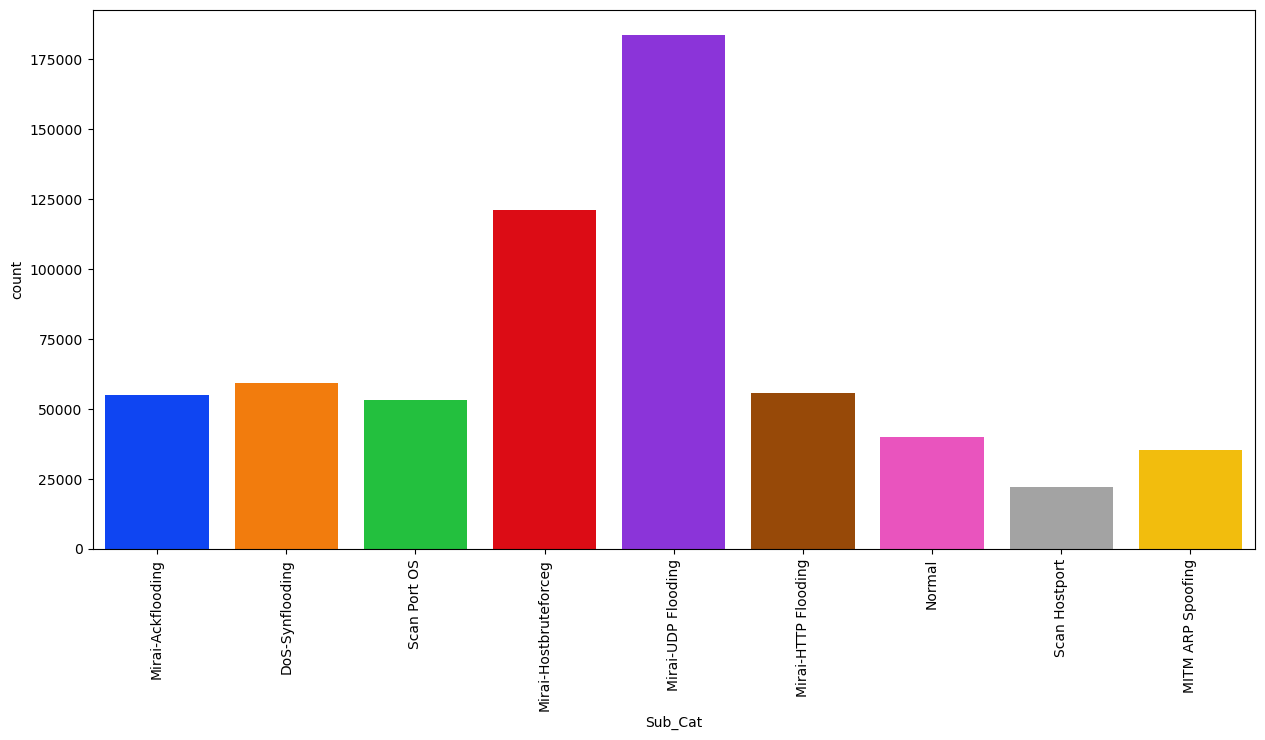

In [12]:
#Exploratory Data Analysis
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Sub_Cat', data=df, palette='bright', saturation=0.90)
plt.xticks(rotation=90)
plt.show()

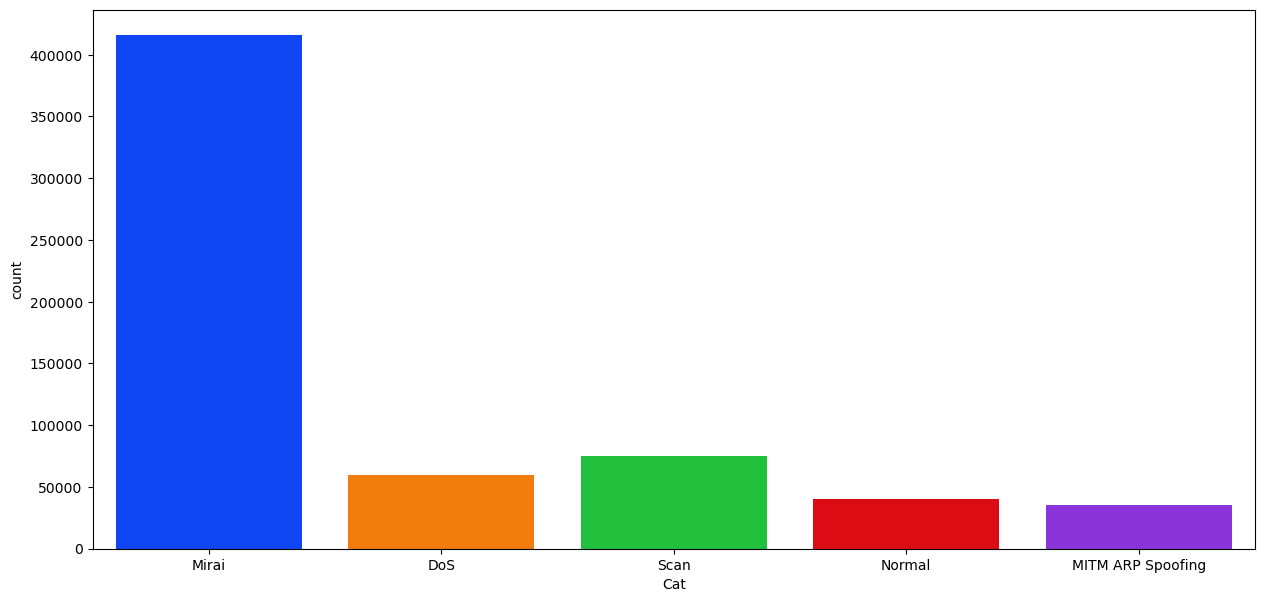

In [13]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Cat', data=df, palette='bright', saturation=0.90)
plt.show()

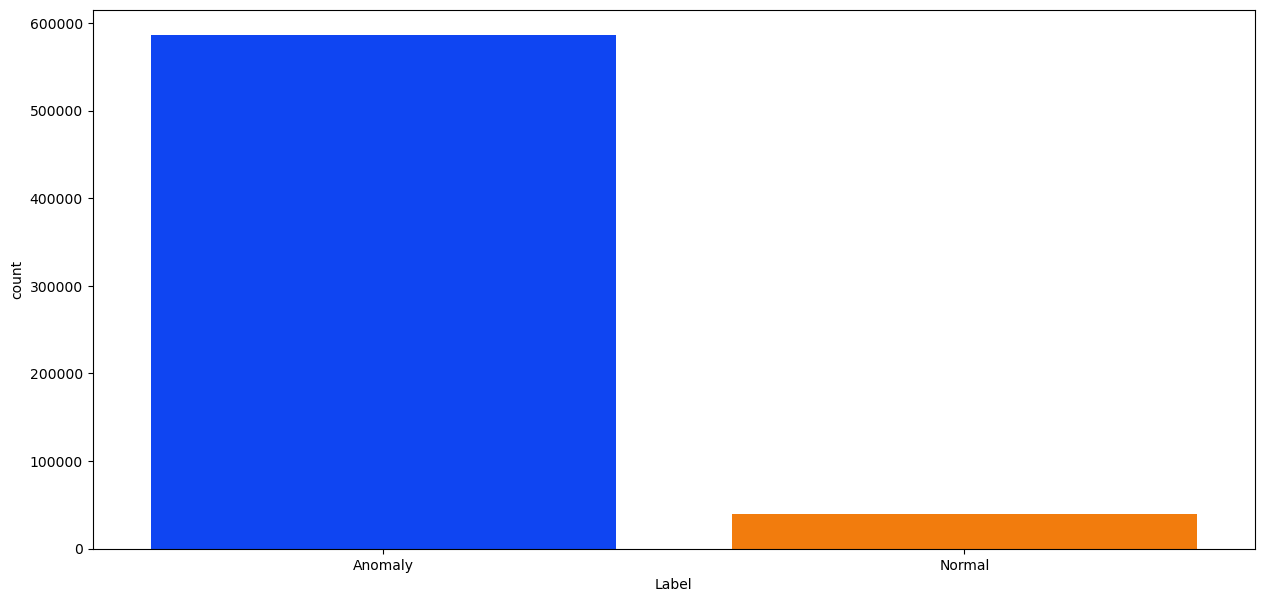

In [14]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Label', data=df, palette='bright', saturation=0.90)
plt.show()

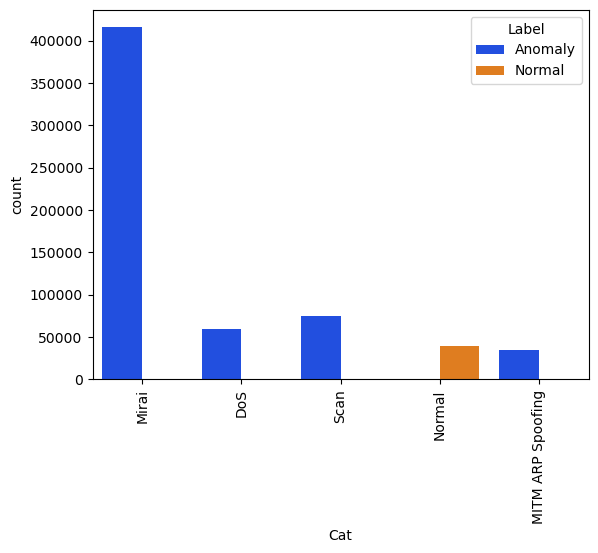

In [15]:
sns.countplot(x = 'Cat', hue = 'Label', data = df, palette='bright')
plt.xticks(rotation=90)
plt.show()

In [16]:
#plt.figure(figsize=(40,30))
#sns.heatmap(df.corr(), annot=True)

## Data Prerocessing

In [17]:
#creating a copy of the dataset
df1 = df.copy()

In [18]:
#droping irrelevant columns
df1.drop(['Flow_ID','Timestamp'], axis=1, inplace=True)

In [19]:
df1.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13,10000,192.168.0.16,10101,17,75.0,1.0,1.0,982.0,1430.0,982.0,982.0,982.0,0.00,1430.0,1430.0,1430.00,0.00,32160000.00,26666.67,75.0,0.00,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,13333.33,13333.33,982.0,1430.0,1280.67,258.65,66901.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1921.00,982.0,1430.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,982.0,1.0,1430.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,75.0,0.00,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,222.160.179.132,2179,192.168.0.13,554,6,5310.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,564.97,2655.0,2261.33,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.00,5310.0,5310.0,0.0,0.0,0.0,0.0,20.0,44.0,188.32,376.65,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,-1.0,14600.0,0.0,0.0,0.0,0.0,0.0,0.0,2655.0,2261.33,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.16,52727,192.168.0.13,9020,6,141.0,0.0,3.0,0.0,2806.0,0.0,0.0,0.0,0.00,1388.0,30.0,935.33,784.04,19900709.22,21276.60,70.5,0.71,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.71,71.0,70.0,0.0,0.0,0.0,0.0,0.0,96.0,0.00,21276.60,30.0,1388.0,1048.50,679.00,461041.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1398.00,0.0,935.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2806.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,70.5,0.71,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.16,52964,192.168.0.13,9020,6,151.0,0.0,2.0,0.0,2776.0,0.0,0.0,0.0,0.00,1388.0,1388.0,1388.00,0.00,18384105.96,13245.03,151.0,0.00,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.00,151.0,151.0,0.0,0.0,0.0,0.0,0.0,64.0,0.00,13245.03,1388.0,1388.0,1388.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2082.00,0.0,1388.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2776.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.00,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1,36763,239.255.255.250,1900,17,153.0,2.0,1.0,886.0,420.0,452.0,434.0,443.0,12.73,420.0,420.0,420.00,0.00,8535947.71,19607.84,76.5,0.71,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,13071.90,6535.95,420.0,452.0,431.50,15.18,230.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.33,443.0,420.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,886.0,1.0,420.0,-1.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,76.5,0.71,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [20]:
df1.round(0)

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13,10000,192.168.0.16,10101,17,75.0,1.0,1.0,982.0,1430.0,982.0,982.0,982.0,0.0,1430.0,1430.0,1430.0,0.0,32160000.0,26667.0,75.0,0.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,13333.0,13333.0,982.0,1430.0,1281.0,259.0,66901.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1921.0,982.0,1430.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,982.0,1.0,1430.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,222.160.179.132,2179,192.168.0.13,554,6,5310.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,565.0,2655.0,2261.0,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.0,5310.0,5310.0,0.0,0.0,0.0,0.0,20.0,44.0,188.0,377.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,-1.0,14600.0,0.0,0.0,0.0,0.0,0.0,0.0,2655.0,2261.0,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.16,52727,192.168.0.13,9020,6,141.0,0.0,3.0,0.0,2806.0,0.0,0.0,0.0,0.0,1388.0,30.0,935.0,784.0,19900709.0,21277.0,70.0,1.0,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.0,1.0,71.0,70.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,21277.0,30.0,1388.0,1048.0,679.0,461041.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1398.0,0.0,935.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2806.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.16,52964,192.168.0.13,9020,6,151.0,0.0,2.0,0.0,2776.0,0.0,0.0,0.0,0.0,1388.0,1388.0,1388.0,0.0,18384106.0,13245.0,151.0,0.0,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.0,151.0,151.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,13245.0,1388.0,1388.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2082.0,0.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2776.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1,36763,239.255.255.250,1900,17,153.0,2.0,1.0,886.0,420.0,452.0,434.0,443.0,13.0,420.0,420.0,420.0,0.0,8535948.0,19608.0,76.0,1.0,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,13072.0,6536.0,420.0,452.0,432.0,15.0,230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.0,443.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,886.0,1.0,420.0,-1.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,76.0,1.0,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24,56112,210.89.164.90,8043,17,277.0,1.0,1.0,18.0,18.0,18.0,18.0,18.0,0.0,18.0,18.0,18.0,0.0,129964.0,7220.0,277.0,0.0,277.0,277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,3610.0,3610.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
def encoder(data):
    for col in data.columns:
        if data[col].dtype == 'object':
                label_encoder = LabelEncoder()
                data[col] = label_encoder.fit_transform(data[col])

In [23]:
encoder(df1)

In [24]:
df1.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,25883,10000,203,10101,17,75.0,1.0,1.0,982.0,1430.0,982.0,982.0,982.0,0.00,1430.0,1430.0,1430.00,0.00,32160000.00,26666.67,75.0,0.00,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,13333.33,13333.33,982.0,1430.0,1280.67,258.65,66901.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1921.00,982.0,1430.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,982.0,1.0,1430.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,75.0,0.00,75.0,75.0,0,2,2
1,34617,2179,200,554,6,5310.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,564.97,2655.0,2261.33,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.00,5310.0,5310.0,0.0,0.0,0.0,0.0,20.0,44.0,188.32,376.65,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,-1.0,14600.0,0.0,0.0,0.0,0.0,0.0,0.0,2655.0,2261.33,4254.0,1056.0,0,0,0
2,25886,52727,200,9020,6,141.0,0.0,3.0,0.0,2806.0,0.0,0.0,0.0,0.00,1388.0,30.0,935.33,784.04,19900709.22,21276.60,70.5,0.71,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.71,71.0,70.0,0.0,0.0,0.0,0.0,0.0,96.0,0.00,21276.60,30.0,1388.0,1048.50,679.00,461041.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1398.00,0.0,935.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2806.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,70.5,0.71,71.0,70.0,0,4,8
3,25886,52964,200,9020,6,151.0,0.0,2.0,0.0,2776.0,0.0,0.0,0.0,0.00,1388.0,1388.0,1388.00,0.00,18384105.96,13245.03,151.0,0.00,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.00,151.0,151.0,0.0,0.0,0.0,0.0,0.0,64.0,0.00,13245.03,1388.0,1388.0,1388.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2082.00,0.0,1388.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2776.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.00,151.0,151.0,0,2,4
4,25881,36763,317,1900,17,153.0,2.0,1.0,886.0,420.0,452.0,434.0,443.0,12.73,420.0,420.0,420.00,0.00,8535947.71,19607.84,76.5,0.71,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,13071.90,6535.95,420.0,452.0,431.50,15.18,230.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.33,443.0,420.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,886.0,1.0,420.0,-1.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,76.5,0.71,77.0,76.0,0,2,4


In [30]:
df1.round(0)

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,25883,10000,203,10101,17,75.0,1.0,1.0,982.0,1430.0,982.0,982.0,982.0,0.0,1430.0,1430.0,1430.0,0.0,32160000.0,26667.0,75.0,0.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,13333.0,13333.0,982.0,1430.0,1281.0,259.0,66901.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1921.0,982.0,1430.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,982.0,1.0,1430.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,75.0,75.0,0,2,2
1,34617,2179,200,554,6,5310.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,565.0,2655.0,2261.0,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.0,5310.0,5310.0,0.0,0.0,0.0,0.0,20.0,44.0,188.0,377.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,-1.0,14600.0,0.0,0.0,0.0,0.0,0.0,0.0,2655.0,2261.0,4254.0,1056.0,0,0,0
2,25886,52727,200,9020,6,141.0,0.0,3.0,0.0,2806.0,0.0,0.0,0.0,0.0,1388.0,30.0,935.0,784.0,19900709.0,21277.0,70.0,1.0,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.0,1.0,71.0,70.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,21277.0,30.0,1388.0,1048.0,679.0,461041.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1398.0,0.0,935.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2806.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,71.0,70.0,0,4,8
3,25886,52964,200,9020,6,151.0,0.0,2.0,0.0,2776.0,0.0,0.0,0.0,0.0,1388.0,1388.0,1388.0,0.0,18384106.0,13245.0,151.0,0.0,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.0,151.0,151.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,13245.0,1388.0,1388.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2082.0,0.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2776.0,-1.0,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,151.0,0,2,4
4,25881,36763,317,1900,17,153.0,2.0,1.0,886.0,420.0,452.0,434.0,443.0,13.0,420.0,420.0,420.0,0.0,8535948.0,19608.0,76.0,1.0,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,13072.0,6536.0,420.0,452.0,432.0,15.0,230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.0,443.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,886.0,1.0,420.0,-1.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,76.0,1.0,77.0,76.0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,25889,56112,233,8043,17,277.0,1.0,1.0,18.0,18.0,18.0,18.0,18.0,0.0,18.0,18.0,18.0,0.0,129964.0,7220.0,277.0,0.0,277.0,277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,3610.0,3610.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,1.0,18.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,277.0,0.0,277.0,277.0,0,2,5
625779,30623,4570,200,554,6,1658.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1206.0,1658.0,0.0,1658.0,1658.0,0.0,0.0,0.0,0.0,0.0,1658.0,1658.0

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_IP             625783 non-null  int32  
 1   Src_Port           625783 non-null  int64  
 2   Dst_IP             625783 non-null  int32  
 3   Dst_Port           625783 non-null  int64  
 4   Protocol           625783 non-null  int64  
 5   Flow_Duration      625783 non-null  float64
 6   Tot_Fwd_Pkts       625783 non-null  float64
 7   Tot_Bwd_Pkts       625783 non-null  float64
 8   TotLen_Fwd_Pkts    625783 non-null  float64
 9   TotLen_Bwd_Pkts    625783 non-null  float64
 10  Fwd_Pkt_Len_Max    625783 non-null  float64
 11  Fwd_Pkt_Len_Min    625783 non-null  float64
 12  Fwd_Pkt_Len_Mean   625783 non-null  float64
 13  Fwd_Pkt_Len_Std    625783 non-null  float64
 14  Bwd_Pkt_Len_Max    625783 non-null  float64
 15  Bwd_Pkt_Len_Min    625783 non-null  float64
 16  Bw

In [37]:
float_features = [feature for feature in df.columns if df[feature].dtype == 'float64']
print(float_features)

['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk

In [39]:
df['Flow_Duration']=df['Flow_Duration'].astype('int')

In [40]:
df['Flow_Duration'].dtypes

dtype('int32')

## Feature Selection

In [25]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [26]:
X = df1.drop(labels='Cat', axis=1)
y = df1['Cat']

In [27]:
mutual_info = mutual_info_classif(X,y)
mutual_info

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').